# RNN for Time Series Prediction of Electricity Consumption

In [135]:
!pip install --upgrade tensorflow
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\chase\anaconda3\envs\rnn-timeseries-for-electricity-consumption\python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.


In [112]:
# Load the data
import os

with open('household_power_consumption.txt') as f:
    data = f.read()

lines = data.split('\n')
header = lines[0].split(';')
lines = lines[1:]
print(header)
print(len(lines))

['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
2075259


In [124]:
import numpy as np
active_power = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header)-2))
for i, line in enumerate(lines):
    values = [(float(x) if x != '?' and x != '' else 0) for x in line.split(';')[2:]] #skip the date and time, can't imput missing values so zero'd them -- which I don't like so...
    if len(values) > 0:
        active_power[i] = values[0]
        raw_data[i, :] = values[:]
        
print(raw_data[:10])

[[  4.216   0.418 234.84   18.4     0.      1.     17.   ]
 [  5.36    0.436 233.63   23.      0.      1.     16.   ]
 [  5.374   0.498 233.29   23.      0.      2.     17.   ]
 [  5.388   0.502 233.74   23.      0.      1.     17.   ]
 [  3.666   0.528 235.68   15.8     0.      1.     17.   ]
 [  3.52    0.522 235.02   15.      0.      2.     17.   ]
 [  3.702   0.52  235.09   15.8     0.      1.     17.   ]
 [  3.7     0.52  235.22   15.8     0.      1.     17.   ]
 [  3.668   0.51  233.99   15.8     0.      1.     17.   ]
 [  3.662   0.51  233.86   15.8     0.      2.     16.   ]]


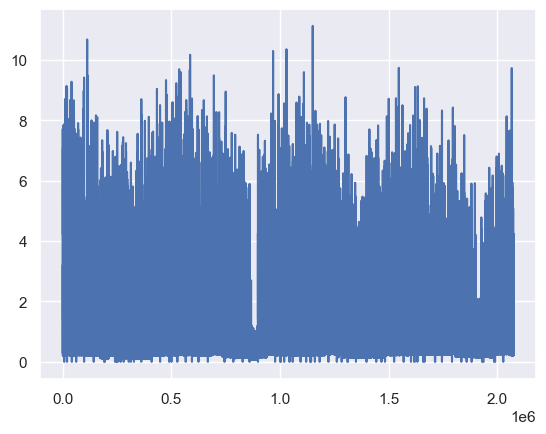

In [114]:
import matplotlib.pyplot as plt

plt.plot(range(len(active_power)), active_power)

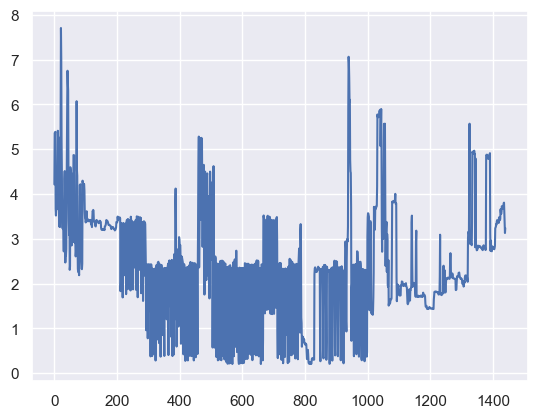

In [115]:
plt.plot(range(1440), active_power[:1440]) #first day only

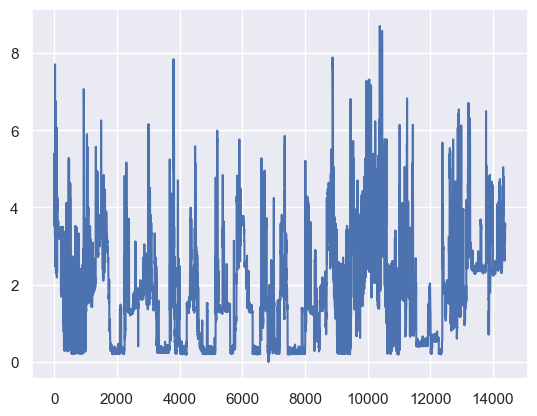

In [130]:
plt.plot(range(14400), active_power[:1440*10]) #first 10 days

In [116]:
#let's use the pandas library instead because I want to impute missing values
import pandas as pd

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, parse_dates={'datetime':[0,1]}, index_col=['datetime'], dayfirst = True)
# Convert all columns to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

display(df)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


<Axes: xlabel='datetime'>

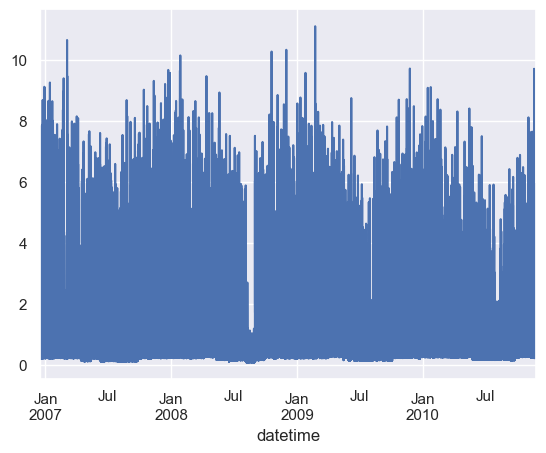

In [117]:
import seaborn as sns #for prettier plots
sns.set()

df['Global_active_power'].plot()

<Axes: xlabel='datetime'>

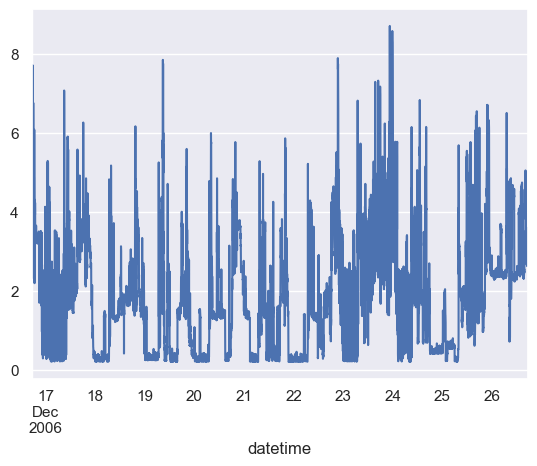

In [118]:
#plot first 10 days only
df['Global_active_power'][:1440*10].plot()

In [119]:
#create a dataframe showing all rows with missing values
df1 = df[df.isna().any(axis=1)]
display(df1) #there are 11 rows with missing values

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#impute missing values using linear interpolation
df.interpolate(method='linear', inplace=True)
#recreate dataframe showing all rows with missing values, which should be empty now
df1 = df[df.isna().any(axis=1)]
display(df1) #empty :)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,


<Axes: xlabel='datetime'>

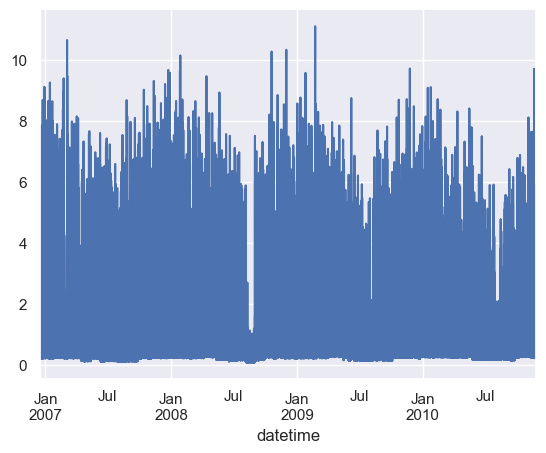

In [121]:
#new plot with interpolated and imputed values
df['Global_active_power'].plot() #doesn't make an obvious visible difference, but it makes me happier

In [138]:
clean_data = df.to_numpy() #convert to numpy array
print(clean_data[:10])
active_power = clean_data[:,0] #active_power = [x[0] for x in clean_data] #same thing, but uses numpy slicing
print(active_power[:10])

[[ 2.7618251   2.73595208 -1.54725754  2.88223318 -0.18564937 -0.07446683
   1.35612975]
 [ 3.77645342  2.90041276 -1.91622415  3.84953226 -0.18564937 -0.07446683
   1.23406672]
 [ 3.7888702   3.46688841 -2.01990072  3.84953226 -0.18564937  0.08327172
   1.35612975]
 [ 3.80128698  3.50343523 -1.88268173  3.84953226 -0.18564937 -0.07446683
   1.35612975]
 [ 2.27402302  3.74098954 -1.29111543  2.33549892 -0.18564937 -0.07446683
   1.35612975]
 [ 2.14453374  3.68616931 -1.49236994  2.167273   -0.18564937  0.08327172
   1.35612975]
 [ 2.30595188  3.66789591 -1.47102477  2.33549892 -0.18564937 -0.07446683
   1.35612975]
 [ 2.30417805  3.66789591 -1.43138373  2.33549892 -0.18564937 -0.07446683
   1.35612975]
 [ 2.27579684  3.57652886 -1.80644896  2.33549892 -0.18564937 -0.07446683
   1.35612975]
 [ 2.27047536  3.57652886 -1.84609     2.33549892 -0.18564937  0.08327172
   1.23406672]]
[2.7618250956934784, 3.776453421830333, 3.788870202045294, 3.8012869822602546, 2.2740230158199912, 2.14453373

In [132]:
#Computing the number of training, validation, and test samples: first 50% for training, 25% for validation, 25% for testing
num_train_samples = int(0.5 * len(clean_data))
num_val_samples = int(0.25 * len(clean_data))
num_test_samples = len(clean_data) - num_train_samples - num_val_samples

print("Number of samples for training:", num_train_samples)
print("Number of samples for validation:", num_val_samples)
print("Number of samples for testing:", num_test_samples)

Number of samples for training: 1037629
Number of samples for validation: 518814
Number of samples for testing: 518816


In [145]:
#Normalizing the data
mean = clean_data[:num_train_samples].mean(axis=0)
clean_data -= mean
std = clean_data[:num_train_samples].std(axis=0)
clean_data /= std

from tensorflow import keras
from tensorflow.keras import layers

sampling_rate = 60 #one data point every hour
sequence_length = 120 #120 hours aka 5 days
delay = sampling_rate * (sequence_length + 24 - 1) #predict 24 hours ahead
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    clean_data[:-delay], 
    targets = active_power[delay:],
    sampling_rate=sampling_rate,
    shuffle = True,
    sequence_length = sequence_length, 
    batch_size=batch_size,
    start_index= 0,
    end_index = num_train_samples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    clean_data[:-delay], 
    targets = active_power[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size=batch_size,
    start_index= num_train_samples,
    end_index = num_train_samples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    clean_data[:-delay], 
    targets = active_power[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size=batch_size,
    start_index= num_train_samples + num_val_samples
)

In [146]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 7)
targets shape: (256,)


In [147]:
#Computing the baseline MAE
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 1.05
Test MAE: 1.01


# Basic Dense Model

In [ ]:
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_dense.tf", save_best_only=True)
]

model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_dense.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

#and plot it
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [155]:
#Training and evaluating a simple LSTM-based RNN model
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.LSTM(16)(inputs) #16 hidden units
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_lstm.tf", save_best_only=True) # .tf instead of .keras because of weird versioning issues
    #keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) #copilot wanted this, research why
]
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae') #copilot wanted this, research why
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_lstm.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
4025/4026 [============================>.] - ETA: 0s - loss: 0.7397 - mae: 0.6054INFO:tensorflow:Assets written to: pikapower_lstm.tf\assets


INFO:tensorflow:Assets written to: pikapower_lstm.tf\assets


4026/4026 [==============================] - 161s 40ms/step - loss: 0.7397 - mae: 0.6053 - val_loss: 0.6437 - val_mae: 0.5756
Epoch 2/10
4025/4026 [============================>.] - ETA: 0s - loss: 0.6868 - mae: 0.5735INFO:tensorflow:Assets written to: pikapower_lstm.tf\assets


INFO:tensorflow:Assets written to: pikapower_lstm.tf\assets


4026/4026 [==============================] - 154s 38ms/step - loss: 0.6868 - mae: 0.5735 - val_loss: 0.6423 - val_mae: 0.5681
Epoch 3/10
4026/4026 [==============================] - 152s 38ms/step - loss: 0.6662 - mae: 0.5622 - val_loss: 0.6677 - val_mae: 0.5871
Epoch 4/10
4026/4026 [==============================] - 152s 38ms/step - loss: 0.6537 - mae: 0.5550 - val_loss: 0.6823 - val_mae: 0.5966
Epoch 5/10
4026/4026 [==============================] - 152s 38ms/step - loss: 0.6463 - mae: 0.5510 - val_loss: 0.6832 - val_mae: 0.5914
Epoch 6/10
4026/4026 [==============================] - 153s 38ms/step - loss: 0.6395 - mae: 0.5475 - val_loss: 0.6775 - val_mae: 0.5928
Epoch 7/10
4026/4026 [==============================] - 153s 38ms/step - loss: 0.6342 - mae: 0.5448 - val_loss: 0.6741 - val_mae: 0.5904
Epoch 8/10
4026/4026 [==============================] - 153s 38ms/step - loss: 0.6305 - mae: 0.5430 - val_loss: 0.6652 - val_mae: 0.5819
Epoch 9/10
4026/4026 [==============================

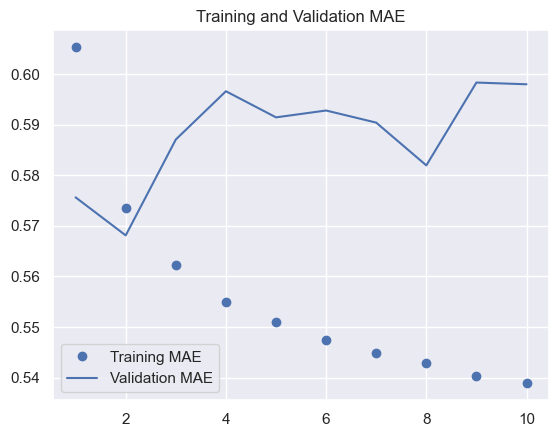

In [156]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [165]:
#Training and evaluating a dropout-regularized LSTM-based RNN model
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1])) #takes 4+ hours to train without rollouts and GPU acceleration
x= layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_lstm_dropout.tf", save_best_only=True)
]
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_lstm_dropout.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
2085/4026 [==============>...............] - ETA: 2:45 - loss: 0.7857 - mae: 0.6353

KeyboardInterrupt: 

In [ ]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Training and evaluating a stacked LSTM-based RNN model

In [164]:
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_gru_stacked.tf", save_best_only=True)
]

model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callbacks)
model = keras.models.load_model("pikapower_gru_stacked.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
1629/4026 [===========>..................] - ETA: 7:01 - loss: 0.7961 - mae: 0.6419

KeyboardInterrupt: 

In [ ]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

# Bidirectional RNN
Training and evaluating a bidirectional LSTM-based RNN model (best used for NLP/text, not this), but transformers are better anyways sooooo

Epoch 1/10
4025/4026 [============================>.] - ETA: 0s - loss: 0.7191 - mae: 0.5947INFO:tensorflow:Assets written to: pikapower_bidirectional_lstm.tf\assets


INFO:tensorflow:Assets written to: pikapower_bidirectional_lstm.tf\assets


4026/4026 [==============================] - 208s 51ms/step - loss: 0.7192 - mae: 0.5947 - val_loss: 0.6587 - val_mae: 0.5972
Epoch 2/10
4026/4026 [==============================] - 193s 48ms/step - loss: 0.6562 - mae: 0.5595 - val_loss: 0.6723 - val_mae: 0.5906
Epoch 3/10
4026/4026 [==============================] - 193s 48ms/step - loss: 0.6277 - mae: 0.5454 - val_loss: 0.6639 - val_mae: 0.5763
Epoch 4/10
4026/4026 [==============================] - 194s 48ms/step - loss: 0.6103 - mae: 0.5367 - val_loss: 0.7658 - val_mae: 0.6400
Epoch 5/10
4026/4026 [==============================] - 196s 49ms/step - loss: 0.5983 - mae: 0.5304 - val_loss: 0.7053 - val_mae: 0.5977
Epoch 6/10
4026/4026 [==============================] - 192s 48ms/step - loss: 0.5886 - mae: 0.5253 - val_loss: 0.7164 - val_mae: 0.6075
Epoch 7/10
4026/4026 [==============================] - 193s 48ms/step - loss: 0.5813 - mae: 0.5213 - val_loss: 0.7414 - val_mae: 0.6256
Epoch 8/10
4026/4026 [==============================

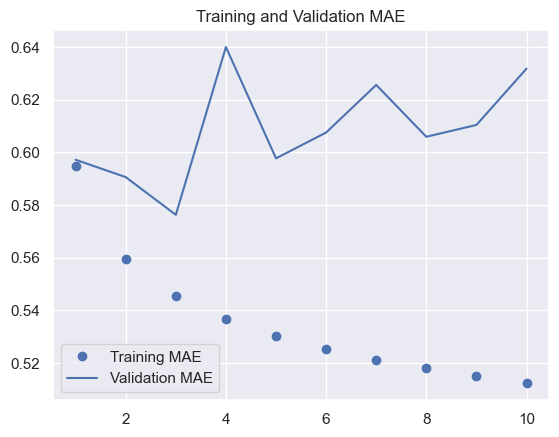

In [167]:
inputs = keras.Input(shape=(sequence_length, clean_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs) #16 hidden units
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_bidirectional_lstm.tf", save_best_only=True) # .tf instead of .keras because of weird versioning issues
    #keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) #copilot wanted this, research why
]
model.compile(optimizer="rmsprop", loss='mse', metrics=['mae'])
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mae') #copilot wanted this, research why
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

model = keras.models.load_model("pikapower_bidirectional_lstm.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

#and plot it
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [184]:
#copilot suggested this, so I'm going to try it for funsies
model = keras.models.Sequential([
    keras.layers.LSTM(32, return_sequences=False, input_shape=(sequence_length, clean_data.shape[-1])),
    keras.layers.Dense(1)
])

callbacks = [
    keras.callbacks.ModelCheckpoint("pikapower_lstm_sequential.tf", save_best_only=True)
]

model.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

model = keras.models.load_model("pikapower_lstm_sequential.tf")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

#and plot it
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

Epoch 1/10
4026/4026 [==============================] - 765s 190ms/step - loss: 0.6967 - mae: 0.5795 - val_loss: 0.6320 - val_mae: 0.5685
Epoch 2/10
4026/4026 [==============================] - 760s 189ms/step - loss: 0.6227 - mae: 0.5389 - val_loss: 0.6701 - val_mae: 0.5813
Epoch 3/10
4026/4026 [==============================] - 760s 189ms/step - loss: 0.5913 - mae: 0.5227 - val_loss: 0.6912 - val_mae: 0.5964
Epoch 4/10
4026/4026 [==============================] - 753s 187ms/step - loss: 0.5689 - mae: 0.5107 - val_loss: 0.6879 - val_mae: 0.5849
Epoch 5/10
4026/4026 [==============================] - 763s 190ms/step - loss: 0.5538 - mae: 0.5020 - val_loss: 0.7122 - val_mae: 0.5964
Epoch 6/10
4026/4026 [==============================] - 767s 191ms/step - loss: 0.5414 - mae: 0.4954 - val_loss: 0.6924 - val_mae: 0.5805
Epoch 7/10
4026/4026 [==============================] - 784s 195ms/step - loss: 0.5339 - mae: 0.4916 - val_loss: 0.6921 - val_mae: 0.5848
Epoch 8/10
4026/4026 [============

OSError: No file or directory found at pikapower_lstm_sequential.tf

Welp... That's a brand new error "OSError: no file or directory found at pikapower_lstm_sequential.tf", which of course it only decided to grace me with after running the entire training block for 2 hours...

In [177]:
!pip install --upgrade torch
#!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 640.0 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.3 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.3 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.3 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.3 MB 9.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.3 MB 19.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.4/9.3 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------  9.3/9.3 MB 25.8 MB/s eta 0:00:01
   ---------------------------------------  9.3/9.3 MB 25.8 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 20.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --------------------------------------- 301.2/301.2 kB 18.2 MB/s eta 0:00:00


In [183]:
#I wanna play with PyTorch too and try some stuff but it's super not working atm so I'm going to comment it out and see if I can get it to work later
# import torch
# import torch.nn as nn
# import torch.optim as optim
# 
# from sklearn.preprocessing import MinMaxScaler
# 
# # Define and fit the scaler
# scaler = MinMaxScaler()
# scaler.fit(clean_data)
# 
# #convert training data to tensor
# train_data_t = torch.tensor(clean_data[:num_train_samples], dtype=torch.float32)
# 
# #model definition
# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_layer_size, output_size):
#         super().__init__()
#         self.hidden_layer_size = hidden_layer_size
#         self.lstm = nn.LSTM(input_size, hidden_layer_size) #add LSTM layer
#         self.linear = nn.Linear(hidden_layer_size, output_size) #add fully connected layer
#         self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
#                             torch.zeros(1,1,self.hidden_layer_size))
#         
#     def forward(self, input_seq):
#         lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
#         predictions = self.linear(lstm_out.view(len(input_seq), -1))
#         return predictions[-1]
#   
# #instantiating the model
# model = LSTM(input_size=clean_data.shape[-1], hidden_layer_size=32, output_size=1)
# #loss
# loss_function = nn.MSELoss()
# #optimizer 
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# 
# print(model)
# 
# 
# #training
# epochs = 10
# 
# for epoch in range(epochs):
#     for samples, targets in train_dataset:
#         optimizer.zero_grad()
#         model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
#                         torch.zeros(1, 1, model.hidden_layer_size))
# 
#         y_pred = model(samples)
#         single_loss = loss_function(y_pred, targets)
#         single_loss.backward()
#         optimizer.step()
# 
#         print(f'epoch: {epoch+1:2} loss: {single_loss.item():10.8f}')
# 
# 
# #test set predictions
# future = 12
# 
# predictions = train_data_t[-sequence_length:].tolist()
# 
# model.eval()
# 
# for i in range(future):
#     seq = torch.FloatTensor(predictions[-sequence_length:])
#     with torch.no_grad():
#         model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
#                         torch.zeros(1, 1, model.hidden_layer_size))
#         predictions.append(model(seq).item())
# print(predictions[sequence_length:])
# print(df['Global_active_power'][-12:])#actual values
# 
# true_predictions = scaler.inverse_transform(np.array(predictions[sequence_length:]).reshape(-1, 1))
# print(true_predictions)